<a href="https://colab.research.google.com/github/Ashvin7510/ML/blob/main/ML_FINAL_!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df=pd.read_csv("/content/t20_cricket_match_score_prediction.csv")
df

,Match ID,Overs Played,Wickets Lost,Run Rate,Home/Away,Opponent Strength,Pitch Condition,Weather,Predicted Score
0,1,7,1,11.04,Away,3,Bowling,Sunny,82
1,2,20,10,11.87,Home,5,Bowling,Sunny,204
2,3,15,7,6.14,Home,7,Balanced,Sunny,105
3,4,11,8,8.84,Home,9,Batting,Cloudy,121
4,5,8,0,9.56,Home,2,Balanced,Sunny,104
...,...,...,...,...,...,...,...,...,...
1495,1496,15,8,9.82,Home,3,Bowling,Overcast,113
1496,1497,2,10,13.41,Home,9,Balanced,Sunny,29
1497,1498,3,6,7.21,Home,1,Batting,Overcast,40
1498,1499,17,6,8.81,Away,5,Bowling,Overcast,116


In [ ]:
df.head()

,Match ID,Overs Played,Wickets Lost,Run Rate,Home/Away,Opponent Strength,Pitch Condition,Weather,Predicted Score
0,1,7,1,11.04,Away,3,Bowling,Sunny,82
1,2,20,10,11.87,Home,5,Bowling,Sunny,204
2,3,15,7,6.14,Home,7,Balanced,Sunny,105
3,4,11,8,8.84,Home,9,Batting,Cloudy,121
4,5,8,0,9.56,Home,2,Balanced,Sunny,104


In [ ]:
df.tail()

,Match ID,Overs Played,Wickets Lost,Run Rate,Home/Away,Opponent Strength,Pitch Condition,Weather,Predicted Score
1495,1496,15,8,9.82,Home,3,Bowling,Overcast,113
1496,1497,2,10,13.41,Home,9,Balanced,Sunny,29
1497,1498,3,6,7.21,Home,1,Batting,Overcast,40
1498,1499,17,6,8.81,Away,5,Bowling,Overcast,116
1499,1500,12,0,13.08,Away,2,Batting,Cloudy,216


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Match ID           1500 non-null   int64  
 1   Overs Played       1500 non-null   int64  
 2   Wickets Lost       1500 non-null   int64  
 3   Run Rate           1500 non-null   float64
 4   Home/Away          1500 non-null   object 
 5   Opponent Strength  1500 non-null   int64  
 6   Pitch Condition    1500 non-null   object 
 7   Weather            1500 non-null   object 
 8   Predicted Score    1500 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 105.6+ KB


In [ ]:
df.isna().sum()

,0
Match ID,0
Overs Played,0
Wickets Lost,0
Run Rate,0
Home/Away,0
Opponent Strength,0
Pitch Condition,0
Weather,0
Predicted Score,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Match ID           1500 non-null   int64  
 1   Overs Played       1500 non-null   int64  
 2   Wickets Lost       1500 non-null   int64  
 3   Run Rate           1500 non-null   float64
 4   Home/Away          1500 non-null   object 
 5   Opponent Strength  1500 non-null   int64  
 6   Pitch Condition    1500 non-null   object 
 7   Weather            1500 non-null   object 
 8   Predicted Score    1500 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 105.6+ KB


In [ ]:
if 'Match ID' in df.columns:
    df.drop(['Match ID'], axis=1, inplace=True)

if 'Home/Away' in df.columns:
    df.drop(['Home/Away'], axis=1, inplace=True)

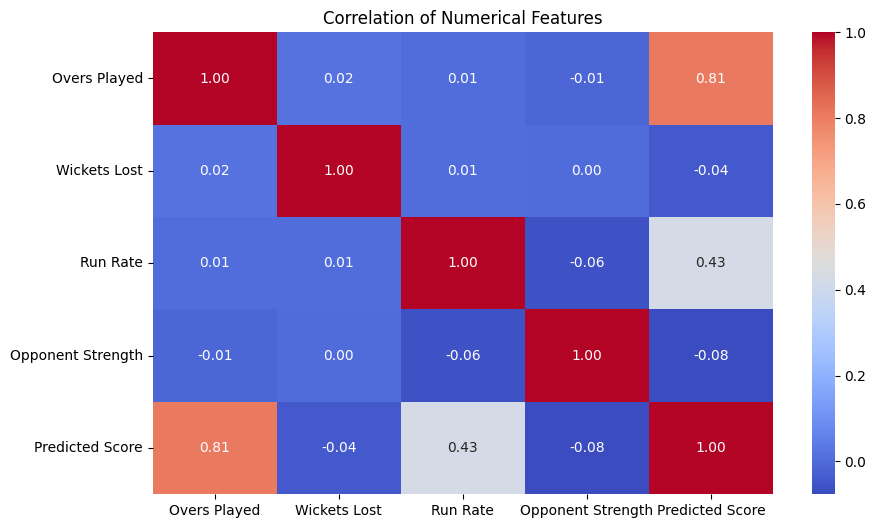

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Numerical Features")
plt.show()

In [ ]:
df.columns

Index(['Overs Played', 'Wickets Lost', 'Run Rate', 'Opponent Strength',
       'Pitch Condition', 'Weather', 'Predicted Score'],
      dtype='object')

In [ ]:
print("\nUnique Pitch Condition Values:", df["Pitch Condition"].unique())
print("Unique Weather Values:", df["Weather"].unique())


Unique Pitch Condition Values: ['Bowling' 'Balanced' 'Batting']
Unique Weather Values: ['Sunny' 'Cloudy' 'Overcast']


In [ ]:
pitch_encoder = LabelEncoder()
df['Pitch Condition'] = pitch_encoder.fit_transform(df['Pitch Condition'])

weather_encoder = LabelEncoder()
df['Weather'] = weather_encoder.fit_transform(df['Weather'])

<ipython-input-13-868d33af8907>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="Set2")


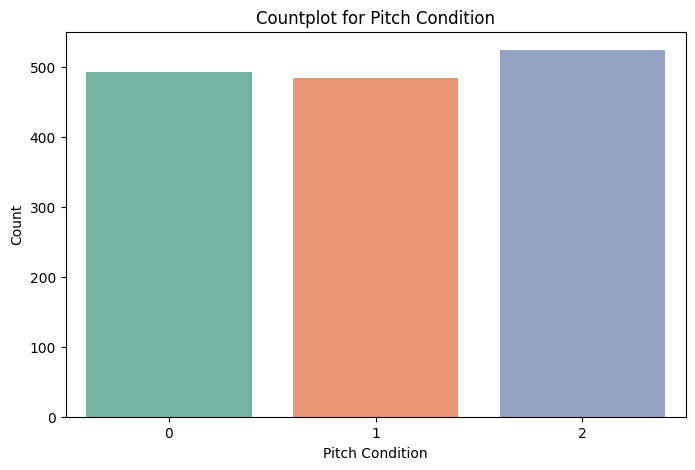

<ipython-input-13-868d33af8907>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="Set2")


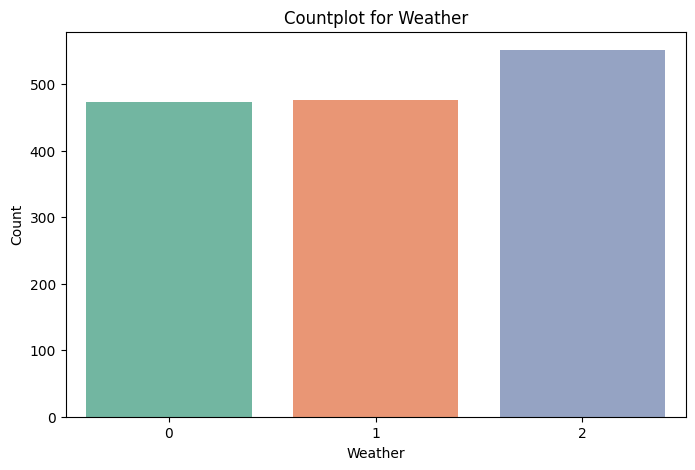

In [ ]:
categorical_columns = ['Pitch Condition', 'Weather']
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df[column], palette="Set2")
    plt.title(f"Countplot for {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

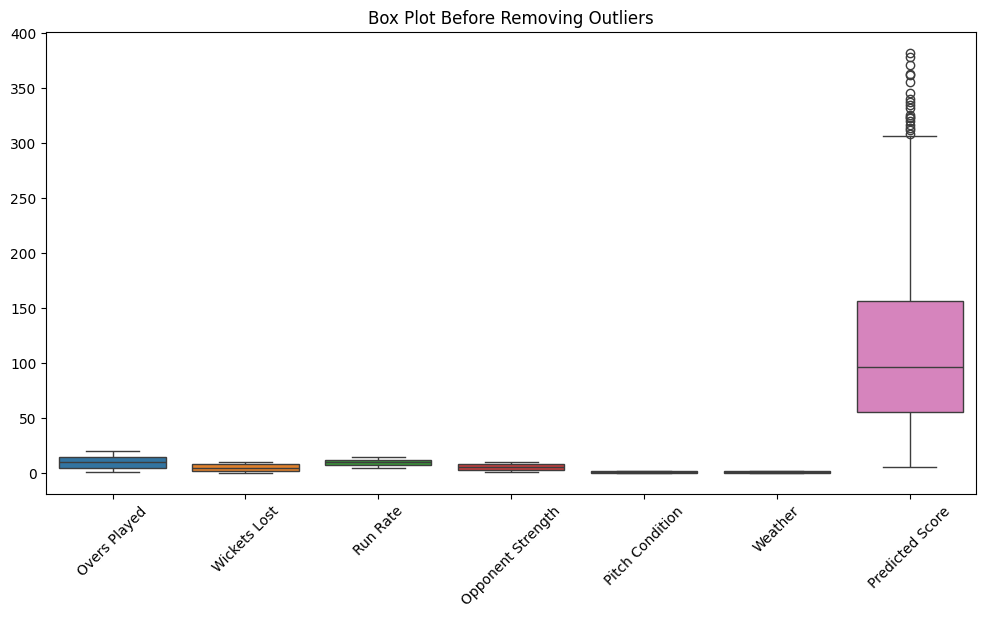

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Box Plot Before Removing Outliers")
plt.xticks(rotation=45)
plt.show()

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

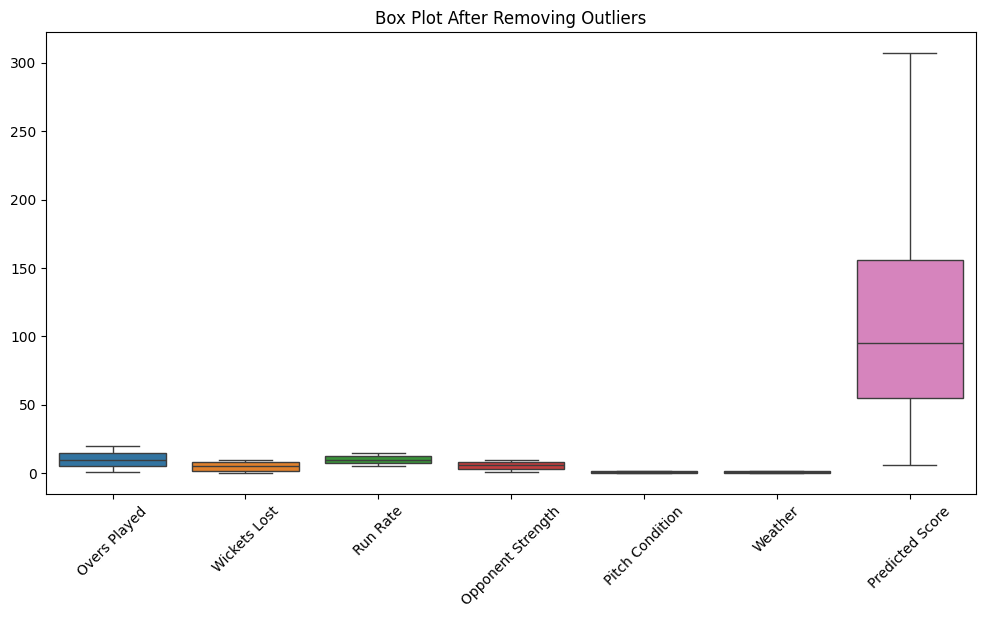

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned)
plt.title("Box Plot After Removing Outliers")
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(f"Total Rows Before Removing Outliers: {df.shape[0]}")
print(f"Total Rows After Removing Outliers: {df_cleaned.shape[0]}")

Total Rows Before Removing Outliers: 1500
Total Rows After Removing Outliers: 1481


In [ ]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
print(df.shape)
print(df.head())

(1500, 7)
   Overs Played  Wickets Lost  Run Rate  Opponent Strength  Pitch Condition  \
0             7             1     11.04                  3                2   
1            20            10     11.87                  5                2   
2            15             7      6.14                  7                0   
3            11             8      8.84                  9                1   
4             8             0      9.56                  2                0   

   Weather  Predicted Score  
0        2               82  
1        2              204  
2        2              105  
3        0              121  
4        2              104  


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=5, random_state=42)
}


In [ ]:
best_model = None
best_score = float("inf")

for name, clf in models.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} -> MSE: {mse}, MAE: {mae}, R2 Score: {r2}")




Linear Regression -> MSE: 805.5204135747097, MAE: 22.659031672438996, R2 Score: 0.8418941229498591
Decision Tree -> MSE: 238.98, MAE: 11.48, R2 Score: 0.9530935009706761
Random Forest -> MSE: 114.63426500570117, MAE: 8.053064863608615, R2 Score: 0.9774998240847887


In [ ]:
if mse < best_score:
        best_score = mse
        best_model = clf


In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
with open("ML_final.pkl", "wb") as file:
    pickle.dump({
        "model": best_model,
        "scaler": scaler,
        "weather_encoder": weather_encoder,
        "pitch_encoder": pitch_encoder
    }, file)

print("✅ Model and encoders saved successfully as 'ML_final.pkl'.")

✅ Model and encoders saved successfully as 'ML_final.pkl'.
